In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 12)

In [4]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(columns=['Unnamed: 0'],axis='columns',inplace=True)

In [7]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
980,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows 10,2.19kg,69210.7200
1280,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
380,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.35kg,63456.4800
1268,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [9]:
## converting ram and inches to int

df['Ram'] = df['Ram'].str.replace("GB","")
df['Weight'] = df['Weight'].str.replace("kg",'')

In [10]:
df['Ram'] = df['Ram'].astype('Int64')
df['Weight'] = df['Weight'].astype('Float64')

In [11]:
df.describe()

,Inches,Ram,Weight,Price
count,1303.000000,1303.0,1303.0,1303.000000
mean,15.017191,8.382195,2.038734,59870.042910
std,1.426304,5.084665,0.665475,37243.201786
min,10.100000,2.0,0.69,9270.720000
25%,14.000000,4.0,1.5,31914.720000
50%,15.600000,8.0,2.04,52054.560000
75%,15.600000,8.0,2.3,79274.246400
max,18.400000,64.0,4.7,324954.720000


In [12]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [13]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [14]:
df['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

In [15]:

df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [16]:
df[df['OpSys'] == 'macOS'].shape

(13, 11)

In [17]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1039,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.64,53839.9728


In [18]:
#creating a new feature form the "ScreenResolution" col 0 
    
df['Touchscreen']=df['ScreenResolution'].apply(lambda X : 1 if "Touchscreen" in X else 0)



In [19]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
803,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,93186.72,1
1015,Toshiba,Notebook,13.3,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.5,64468.80,0
781,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.3,125208.00,0
242,Asus,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,No OS,2.69,47365.92,0
118,Asus,Notebook,17.3,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.0,30049.92,0


<Axes: xlabel='Touchscreen', ylabel='Price'>

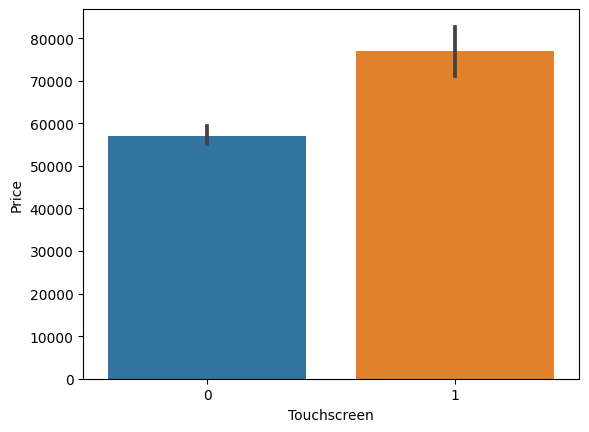

In [20]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [21]:
df['IPS ']=df['ScreenResolution'].apply(lambda X : 1 if "IPS " in X else 0)

In [22]:
# separationg the screen size into x and y

new = df['ScreenResolution'].str.split('x',expand=True)


In [23]:

df['X_res'] =  new[0]
df['Y_res'] = new[1]

In [24]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
183,Toshiba,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,2.0,42251.04,0,0,1366,768
1183,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 2GHz,4,500GB HDD,Intel HD Graphics 500,Windows 10,2.1,17742.24,0,0,1366,768
262,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.1,38468.16,0,1,IPS Panel Full HD 1920,1080
993,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.3,71874.72,0,0,Full HD 1920,1080
1207,Lenovo,Notebook,15.6,1366x768,AMD E-Series 9000 2.2GHz,4,500GB HDD,AMD Radeon R2 Graphics,Windows 10,2.2,15930.72,0,0,1366,768


In [25]:

df['X_res'] = df['X_res'].str.findall(r'(\d+\.?\d+)').apply(lambda X: X[0])

In [26]:
df['X_res']=df['X_res'].astype('Int32')
df['Y_res']=df['Y_res'].astype('Int32')

In [27]:
df.corr()['Price']

C:\Users\Tafique Hossain Khan\AppData\Local\Temp\ipykernel_4916\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [28]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [29]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [30]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [31]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [32]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [33]:
df['Cpu'] = df['Cpu'].apply(lambda x: " ".join(x.split(" ")[0:3]))

In [34]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [35]:
df['Cpu brand'] = df['Cpu'].apply(fetch_processor)

In [36]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [37]:
df.drop(columns=['Cpu'],inplace=True)

In [38]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [39]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

In [40]:
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [41]:
new = df["Memory"].str.split("+", n = 1, expand = True)

In [42]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()

In [43]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [44]:
df["second"]= new[1]

In [45]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [46]:
df['first'] = df['first'].str.replace(r'\D', '')

C:\Users\Tafique Hossain Khan\AppData\Local\Temp\ipykernel_4916\46576210.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')


In [47]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
709,HP,Notebook,6,2000 HDD,AMD Radeon 530,Windows 10,2.71,34898.9328,0,1,127.335675,AMD Processor,2000,None,1,0,0,0
567,Fujitsu,Notebook,8,1000 HDD,Intel HD Graphics 620,Windows 10,2.2,39373.9200,0,0,100.454670,Intel Core i5,1000,None,1,0,0,0
286,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 630,Windows 10,1.95,58448.1600,0,1,141.211998,Intel Core i7,256,None,0,1,0,0
601,HP,Notebook,4,500 HDD,Intel HD Graphics 620,Windows 10,2.1,35616.6144,0,0,100.454670,Intel Core i3,500,None,1,0,0,0
968,Dell,Gaming,32,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,167778.7200,0,1,127.335675,Intel Core i7,256,1000 HDD,0,1,0,0


In [48]:
df["second"].fillna("0", inplace = True)


In [49]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
761,Dell,Ultrabook,16,256 SSD,Intel HD Graphics 620,Windows 10,1.18,99047.5200,0,0,176.232574,Intel Core i7,256,0,0,1,0,0
655,Toshiba,Notebook,8,500 HDD,Intel HD Graphics 620,Windows 10,2.0,56689.9200,0,1,141.211998,Intel Core i5,500,0,1,0,0,0
211,Asus,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.9,74964.9600,0,0,127.335675,Intel Core i7,256,1000 HDD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,0,1
1216,Acer,Notebook,4,1000 HDD,Nvidia GeForce 940MX,Windows 10,3.3,31861.4400,0,0,106.113062,Intel Core i3,1000,0,1,0,0,0


In [50]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

C:\Users\Tafique Hossain Khan\AppData\Local\Temp\ipykernel_4916\2245375830.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [51]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [52]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
1012,HP,Notebook,4,256 SSD,Intel HD Graphics 620,Windows 10,1.48,84715.20,0,0,...,256,0,0,1,0,0,0,0,0,0
1222,HP,Notebook,6,1000 HDD,AMD Radeon 530,Windows 10,2.1,28185.12,0,0,...,1000,0,1,0,0,0,0,0,0,0
497,HP,Notebook,8,1000 SSD,Intel HD Graphics 620,Windows 10,1.48,93186.72,0,0,...,1000,0,0,1,0,0,0,0,0,0
221,Lenovo,2 in 1 Convertible,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.74,47898.72,0,1,...,256,0,0,1,0,0,0,0,0,0
845,Dell,Notebook,4,256 SSD,AMD Radeon R5 M420,Windows 10,2.18,39373.92,0,0,...,256,0,0,1,0,0,0,0,0,0


In [53]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [54]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [55]:
df.drop(columns=['Memory'],inplace=True)

In [56]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
687,Dell,Notebook,4,AMD Radeon R5 M430,Windows 10,2.2,29073.2976,0,0,100.454670,Intel Core i3,1000,0,0,0
237,Asus,Notebook,4,AMD Radeon R5 M430,Windows 10,2.2,30636.0000,0,0,141.211998,AMD Processor,1000,128,0,0
813,Dell,Notebook,8,Nvidia GeForce GT 940MX,Windows 10,1.98,51202.0800,0,0,141.211998,Intel Core i7,1000,0,0,0
724,MSI,Gaming,8,Nvidia GeForce GTX 1050 Ti,Windows 10,2.7,71847.0144,0,0,127.335675,Intel Core i7,1000,128,0,0
294,Lenovo,Notebook,8,Intel UHD Graphics 620,Windows 10,2.05,39373.9200,0,0,141.211998,Intel Core i5,0,256,0,0


In [57]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [58]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [59]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [60]:
df = df[df['Gpu brand'] != "ARM"]

In [61]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

In [62]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [63]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [64]:
df['os'] = df['OpSys'].apply(cat_os)

In [65]:
df.drop(columns=['OpSys'],inplace=True)

C:\Users\Tafique Hossain Khan\AppData\Local\Temp\ipykernel_4916\708458291.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


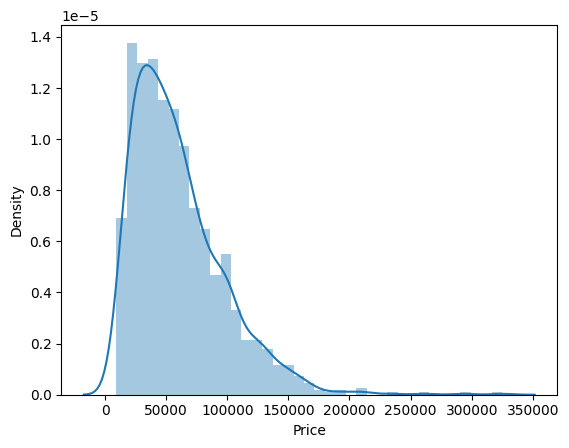

In [66]:
sns.distplot(df['Price'])
plt.show()

In [69]:
df.to_csv("cleaned_laptop_data.csv")